In [1]:
import numpy as np
import matplotlib.pyplot as plt

# plt.style.use('dark_background')

In [61]:
N = np.array([16**3,32**3, 64**3, 128**3, 256**3])

# CPU: Intel(R) Xeon(R) CPU E5-2680 v4 @ 2.40GHz
cpu_f64_times = np.array([622e-6, 4.52e-3, 41.2e-3, 404e-3, 3.69])
cpu_f32_times = np.array([1.12e-3, 8.03e-3, 74.8e-3, 638e-3, 5.44])

# GPU: Nvidia Tesla V100-SXM2-16GB
gpu_f64_times = np.array([636e-6, 577e-6, 654e-6, 3.59e-3, 28.4e-3])
gpu_f32_times = np.array([505e-6, 568e-6, 614e-6, 3.23e-3, 24.3e-3])

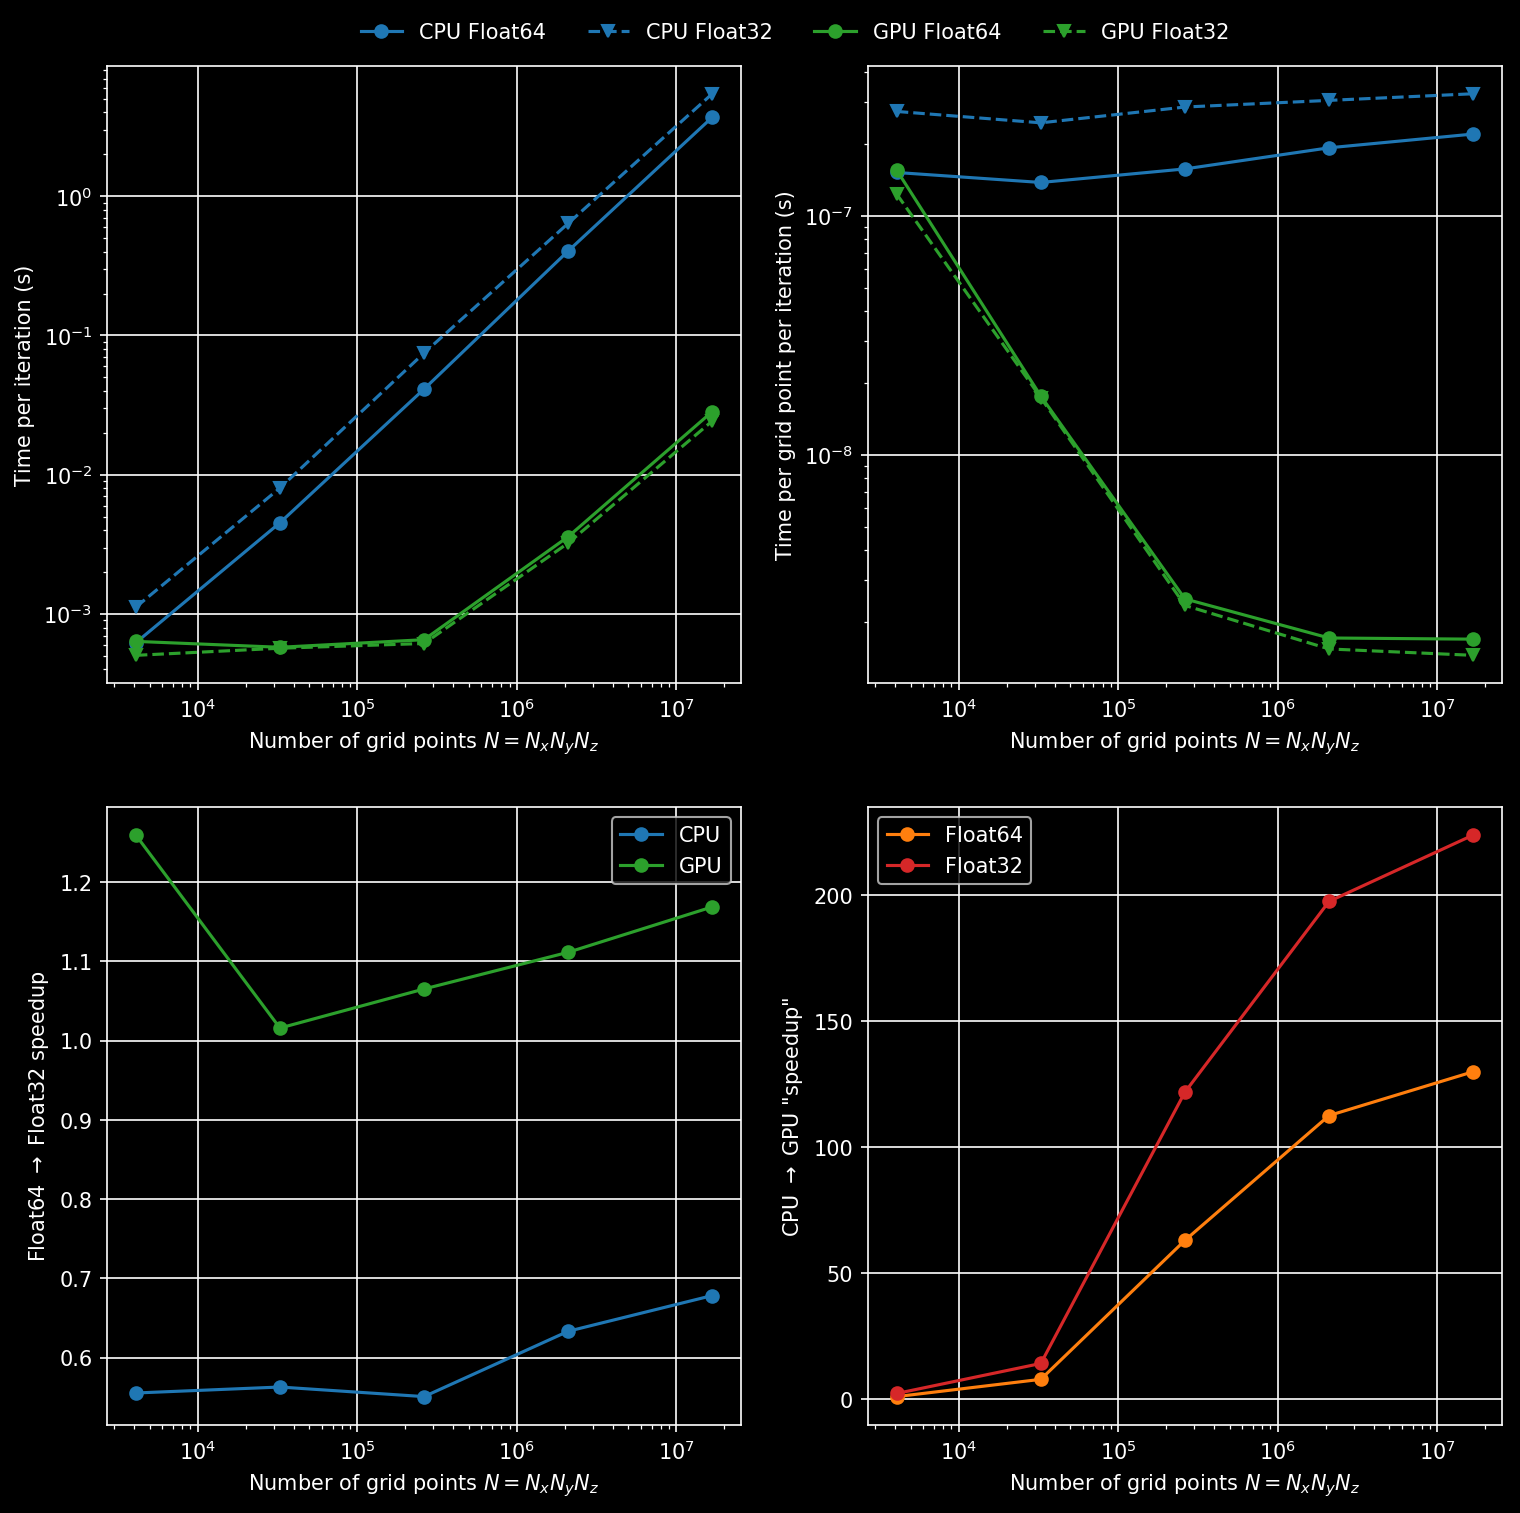

In [92]:
fig = plt.figure(figsize=(12, 12), dpi=150)

plt.subplot(221)
plt.loglog(N, cpu_f64_times, color="tab:blue", linestyle="-", marker="o", label="CPU Float64")
plt.loglog(N, cpu_f32_times, color="tab:blue", linestyle="--", marker="v", label="CPU Float32")
plt.loglog(N, gpu_f64_times, color="tab:green", linestyle="-", marker="o", label="GPU Float64")
plt.loglog(N, gpu_f32_times, color="tab:green", linestyle="--", marker="v", label="GPU Float32")
plt.xlabel("Number of grid points $N = N_xN_yN_z$")
plt.ylabel("Time per iteration (s)")
plt.grid()

plt.legend(ncol=4, bbox_to_anchor=(1, 1.05, 0.8, 0.05), frameon=False)

plt.subplot(222)
plt.loglog(N, cpu_f64_times / N, color="tab:blue", linestyle="-", marker="o")
plt.loglog(N, cpu_f32_times / N, color="tab:blue", linestyle="--", marker="v")
plt.loglog(N, gpu_f64_times / N, color="tab:green", linestyle="-", marker="o")
plt.loglog(N, gpu_f32_times / N, color="tab:green", linestyle="--", marker="v")
plt.xlabel("Number of grid points $N = N_xN_yN_z$")
plt.ylabel("Time per grid point per iteration (s)")
plt.grid()

plt.subplot(223)
plt.semilogx(N, cpu_f64_times / cpu_f32_times, color="tab:blue", linestyle="-", marker="o", label="CPU")
plt.semilogx(N, gpu_f64_times / gpu_f32_times, color="tab:green", linestyle="-", marker="o", label="GPU")
plt.xlabel("Number of grid points $N = N_xN_yN_z$")
plt.ylabel(r"Float64 $\rightarrow$ Float32 speedup")
plt.legend()
plt.grid()

plt.subplot(224)
plt.semilogx(N, cpu_f64_times / gpu_f64_times, color="tab:orange", linestyle="-", marker="o", label="Float64")
plt.semilogx(N, cpu_f32_times / gpu_f32_times, color="tab:red", linestyle="-", marker="o", label="Float32")
plt.xlabel("Number of grid points $N = N_xN_yN_z$")
plt.ylabel(r'CPU $\rightarrow$ GPU "speedup"')
plt.legend()
plt.grid()

plt.show()

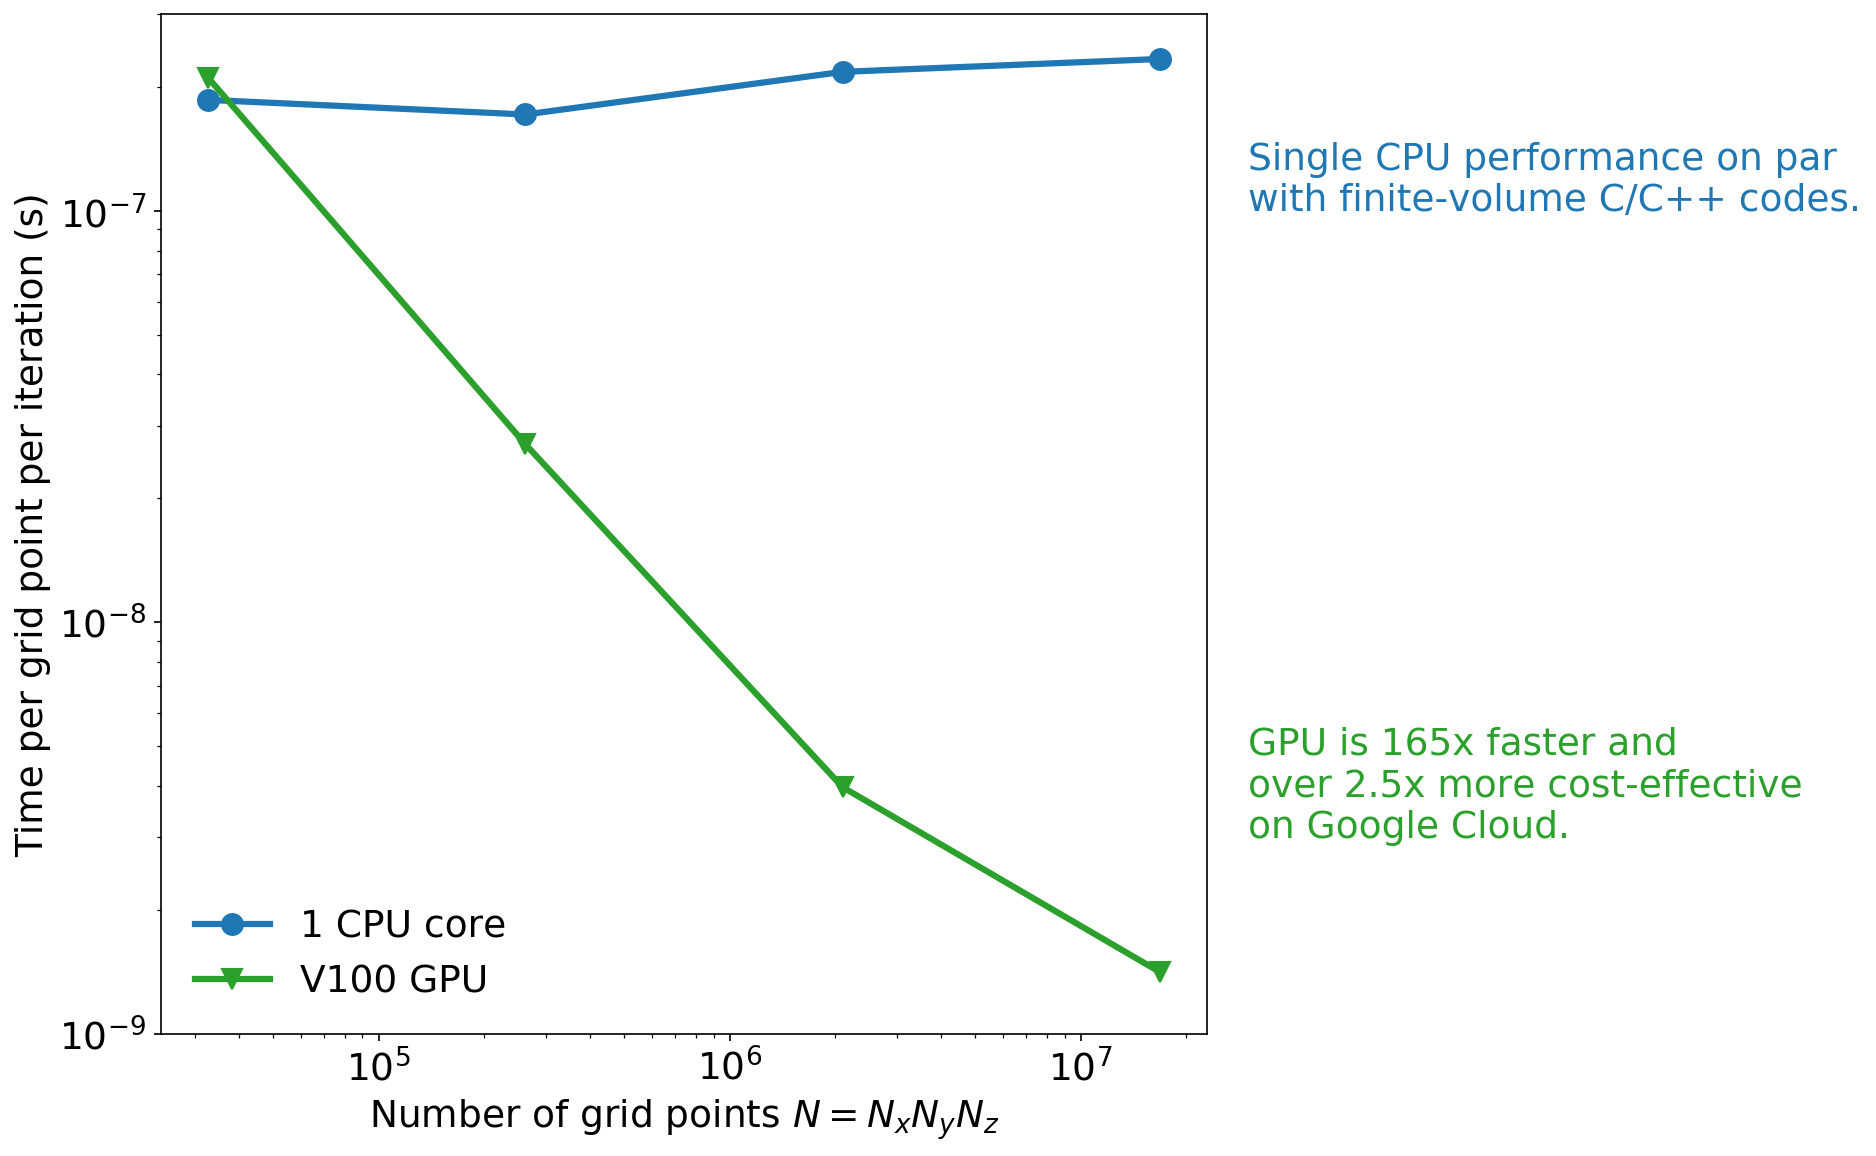

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({'font.size': 18})
# plt.style.use('dark_background')

N = np.array([32**3, 64**3, 128**3, 256**3])
cpu64_ts = np.array([6.09e-3, 44.9e-3, 456e-3, 3.92])
gpu64_ts = np.array([6.88e-3, 7.09e-3, 8.33e-3, 23.7e-3])

fig = plt.figure(figsize=(9, 9), dpi=150)

plt.loglog(N, cpu64_ts / N, color="tab:blue", linestyle="-", linewidth=3, marker="o", markersize=10, label="1 CPU core")
plt.loglog(N, gpu64_ts / N, color="tab:green", linestyle="-", linewidth=3, marker="v", markersize=10, label="V100 GPU")
plt.xlabel("Number of grid points $N = N_xN_yN_z$")
plt.ylabel("Time per grid point per iteration (s)")
plt.ylim([1e-9, 3e-7])
plt.legend(frameon=False)

plt.text(3e7, 1e-7, "Single CPU performance on par\nwith finite-volume C/C++ codes.", color="tab:blue")
plt.text(3e7, 3e-9, "GPU is 165x faster and\nover 2.5x more cost-effective\non Google Cloud.", color="tab:green")

plt.show()